# Import Required Packages

In [208]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# Loading the Dataset

In [209]:
df = pd.read_json("heart.json") # Reading Dataset

df.head() # Displays first 5 columns 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Understanding The Dataset

In [210]:
df.columns # Name of columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [211]:
df.shape # shape - (no. of rows, no. of columns)

(918, 12)

In [212]:
df.info() # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [213]:
df.describe().T  # Description/summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [214]:
df.isna().sum() #counting the number of null values in each column

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [215]:
df.HeartDisease.replace(to_replace = { 0 : "NO", 1 : "YES" }, inplace = True) # Replacing 0,1 with NO,YES for easy understanding

df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
520,64,M,ASY,130,223,0,ST,128,N,0.5,Flat,NO


In [216]:
df.FastingBS.replace(to_replace={0: "No", 1: "Yes"}, inplace=True) # Counting the number of 'NO' and 'YES' in outcome column

df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
487,57,M,ASY,140,214,No,ST,144,Y,2.0,Flat,YES


In [217]:
df.Sex.value_counts() # count values of 'Sex' column 

M    725
F    193
Name: Sex, dtype: int64

In [218]:
df.ChestPainType.value_counts() # count values of 'ChestPainType' column

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [219]:
df.RestingECG.value_counts() # count values of 'RestingECG' column

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [220]:
df.ST_Slope.value_counts() # count values of 'ST_Slope' column

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [221]:
df.FastingBS.value_counts() # count values of 'FastingBS' column

No     704
Yes    214
Name: FastingBS, dtype: int64

In [222]:
df.ExerciseAngina.value_counts() # count values of 'ExerciseAngina' column

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [223]:
df.HeartDisease.value_counts() # count values of 'HeartDisease' column

YES    508
NO     410
Name: HeartDisease, dtype: int64

In [224]:
df.HeartDisease.value_counts(normalize = True) # percentage of split between the categorical values

# About 55% of the people have heart disease (Class 1) 
# and remaining 45% of the people didn't have heart disease (Class 0)

YES    0.553377
NO     0.446623
Name: HeartDisease, dtype: float64

# Data Visualization

In [225]:
from scipy import stats
from statsmodels.api import qqplot
numerical_col = ['Age', 'RestingBP', 'Cholesterol', 
                      'MaxHR', 'Oldpeak']
categorical_col = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                       'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [226]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):

  # sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # displays histogram of the given dataframe column
  sns.histplot( x = col_name, data = df, ax = axes[0][0], bins = 20 )

  # displays quantile-quantile plot of the given dataframe column
  qqplot( data = df[col_name], ax = axes[0][1], line = "45", fit = True )

  # displays kernel density estimate plot of the given dataframe column
  sns.kdeplot( x = col_name, data= df, ax = axes[1][0], fill = True )

  # displays cumulative density plot of the given dataframe column 
  sns.kdeplot( x = col_name, data= df, ax = axes[1][1], fill = True, cumulative = True ) 

  # sets the title for the subplot as "Distribution of <column name>"  
  plt.suptitle( "Distribution of " + col_name )

  plt.show()  # shows the plot

In [227]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):

  # sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # displays boxplot of the given dataframe column
  sns.boxplot( y = col_name, x = "HeartDisease", data = df, ax = axes[0][0], palette = "viridis_r" )

  # displays violinplot of the given dataframe column
  sns.violinplot( y = col_name, x = "HeartDisease", data = df, ax = axes[0][1],  split = True, palette = "viridis_r" )

  # displays swarmplot of the given dataframe column
  sns.swarmplot( y = col_name, x = "HeartDisease", data = df, ax = axes[1][0], palette = "viridis_r" ) 

  # displays barplot of the given dataframe column respect to 'Outcome' column
  sns.barplot( y = col_name, x = "HeartDisease", data = df, hue="HeartDisease", ax = axes[1][1], palette = "viridis_r" )

  # sets the title for the subplot as "Statistics of <column name>"
  plt.suptitle( "Statistics of " + col_name )

  plt.show()  # shows the plot 

In [228]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):

  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
  facet = sns.FacetGrid( data = df, hue = "HeartDisease", aspect = 4, palette = "bright")

  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
  facet.map(sns.kdeplot, col_name, shade = True)

  # sets the x axis from 0 to maximum value of the column
  facet.set(xlim = (0, df[col_name].max()))

  # add legend to the plot
  facet.add_legend()

  # sets the title for the plot as "<column name> respect to Outcome"
  plt.title( col_name + " respect to Outcome")
  
  plt.show()  # shows the plot

In [229]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorical(col_name):
  # sets 1 x 2 subplots with figure size of (13,9)
  fig,axes = plt.subplots( 1, 2, figsize = (13,9))

  # plots pie chart of given column with % percentage
  df[col_name].value_counts().plot.pie(autopct="%.0f%%", shadow=True, ax=axes[0])

  # plots barplot of given column
  df[col_name].value_counts().plot.bar(ax = axes[1] )

  # set plot's title
  fig.suptitle(col_name.title())
  
  # shows the plot
  plt.show()

# Sex

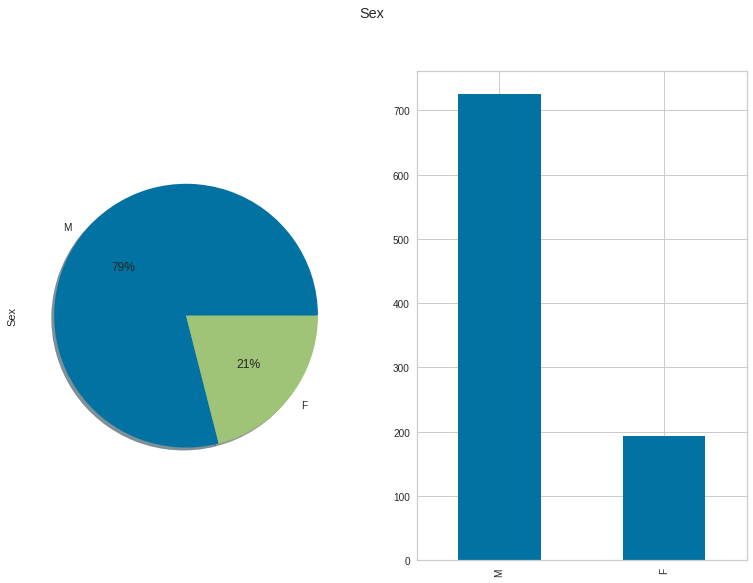

In [230]:
plot_categorical(categorical_col[0])

# ChestPainType

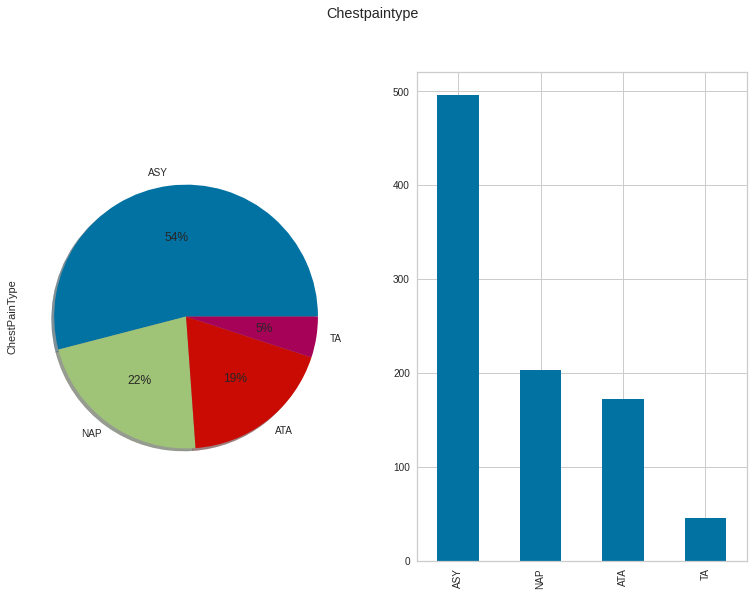

In [231]:
plot_categorical(categorical_col[1])

# FastingBS

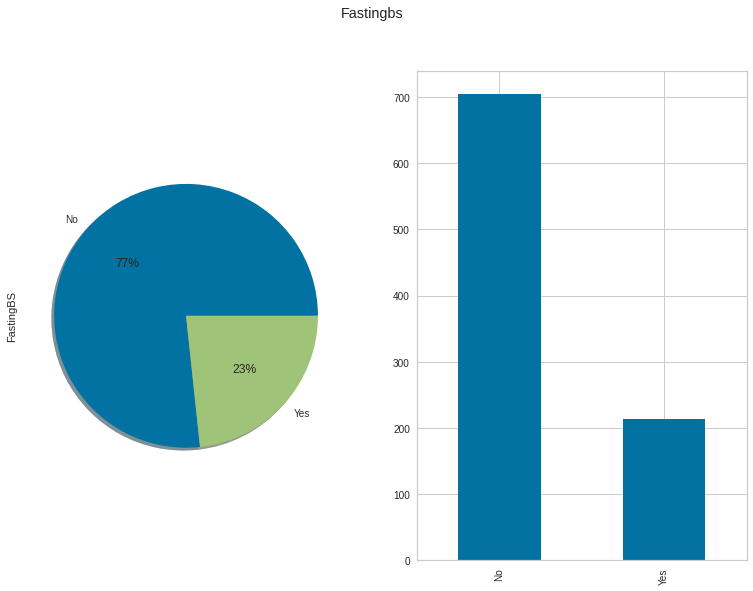

In [232]:
plot_categorical(categorical_col[2])

# RestingECG

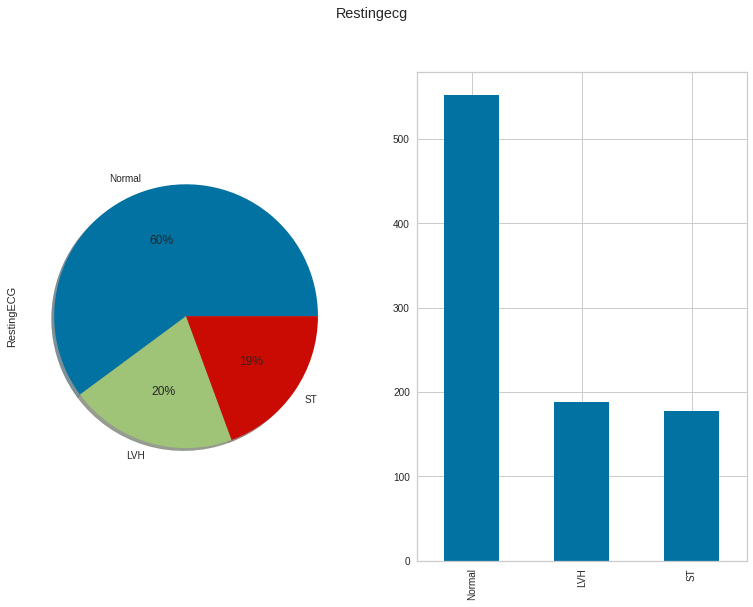

In [233]:
plot_categorical(categorical_col[3])

# ExerciseAngina

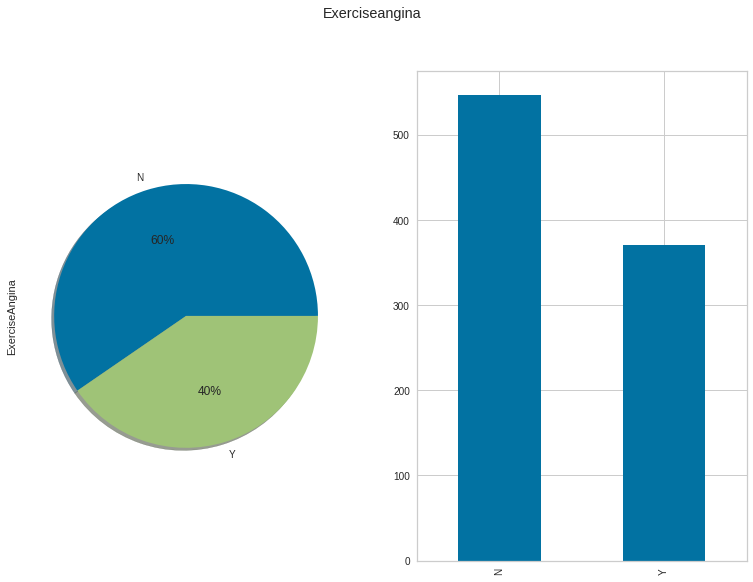

In [234]:
plot_categorical(categorical_col[4])

# St_Slope

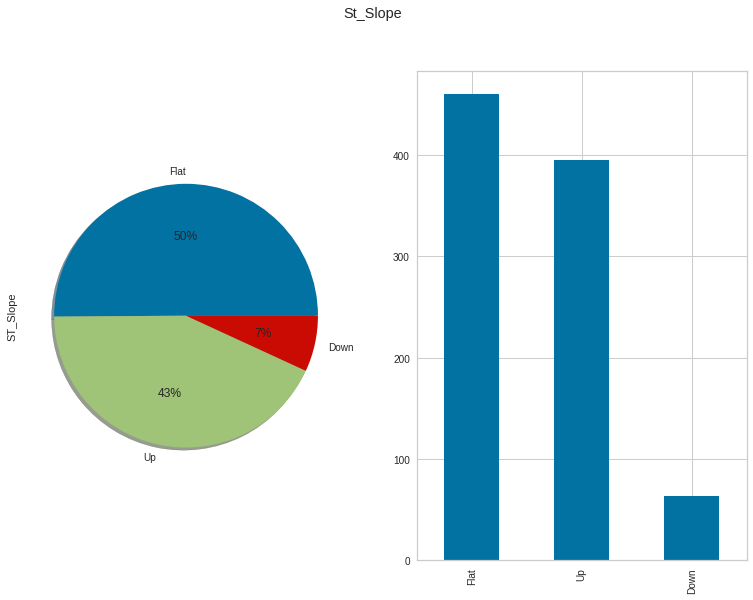

In [235]:
plot_categorical(categorical_col[5])

# HeartDisease

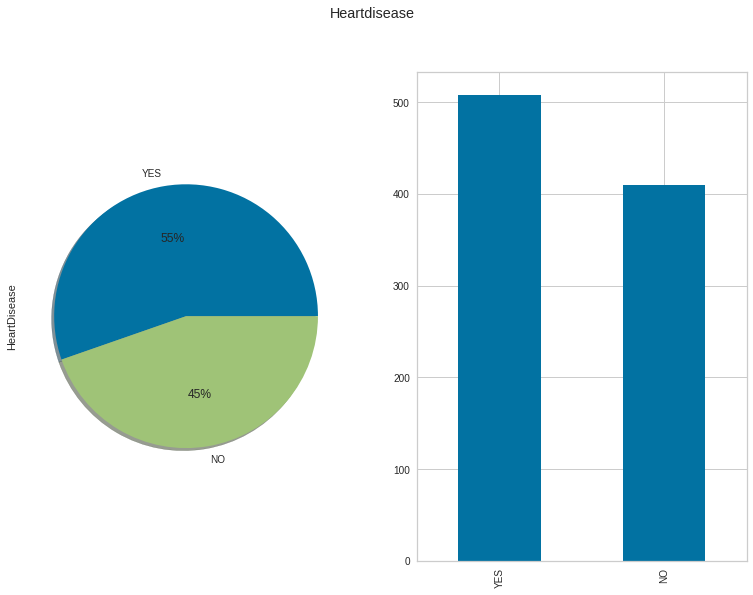

In [236]:
plot_categorical(categorical_col[6])

# Age

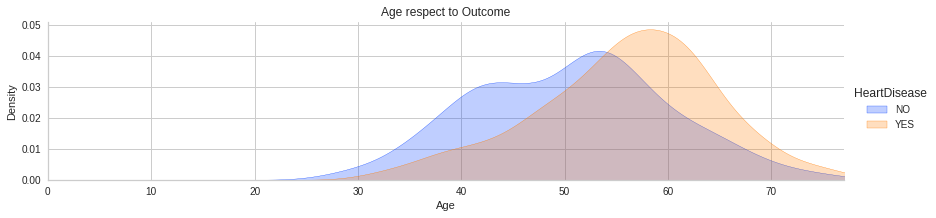

In [237]:
plot_kde(numerical_col[0])

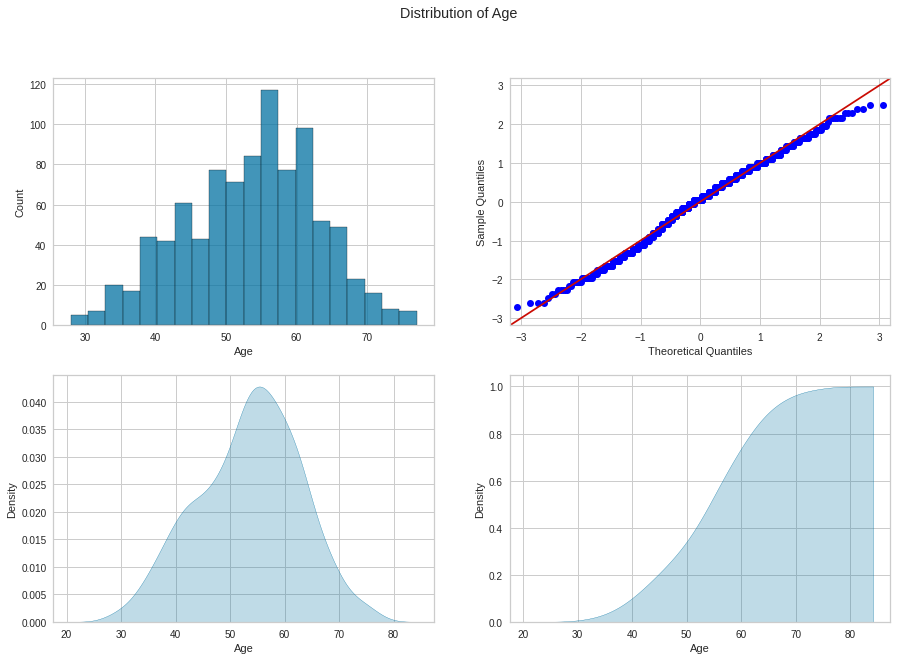

In [238]:
plot_distribution(numerical_col[0])

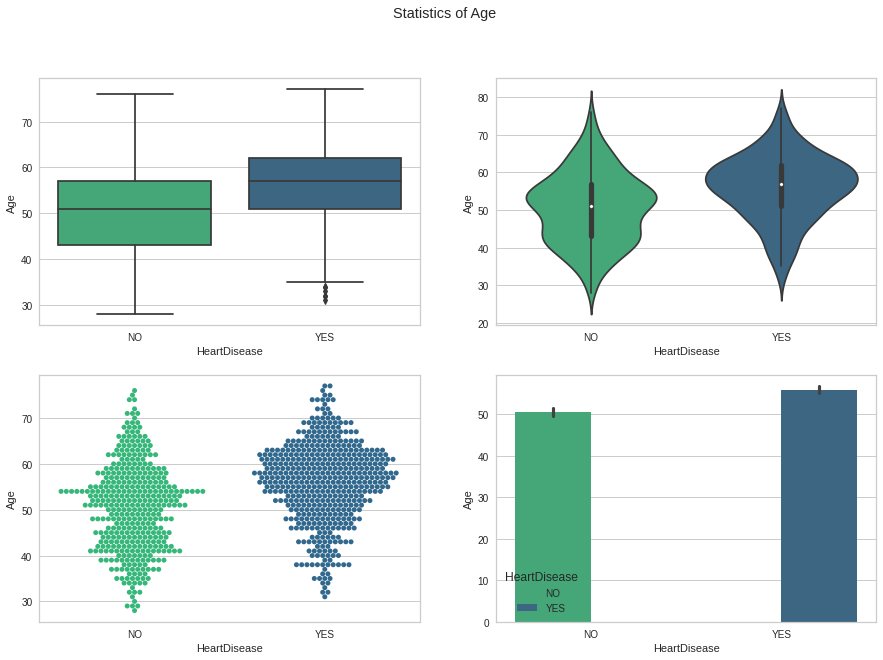

In [239]:
plot_stats(numerical_col[0])

# RestingBP

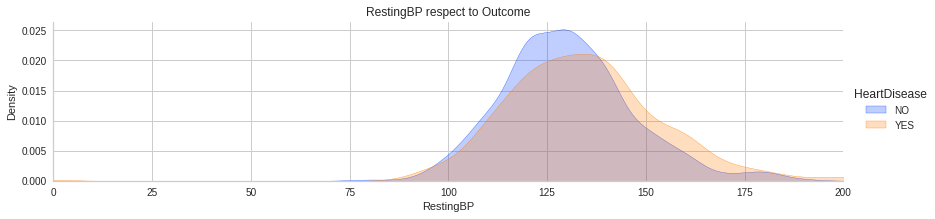

In [240]:
plot_kde(numerical_col[1])

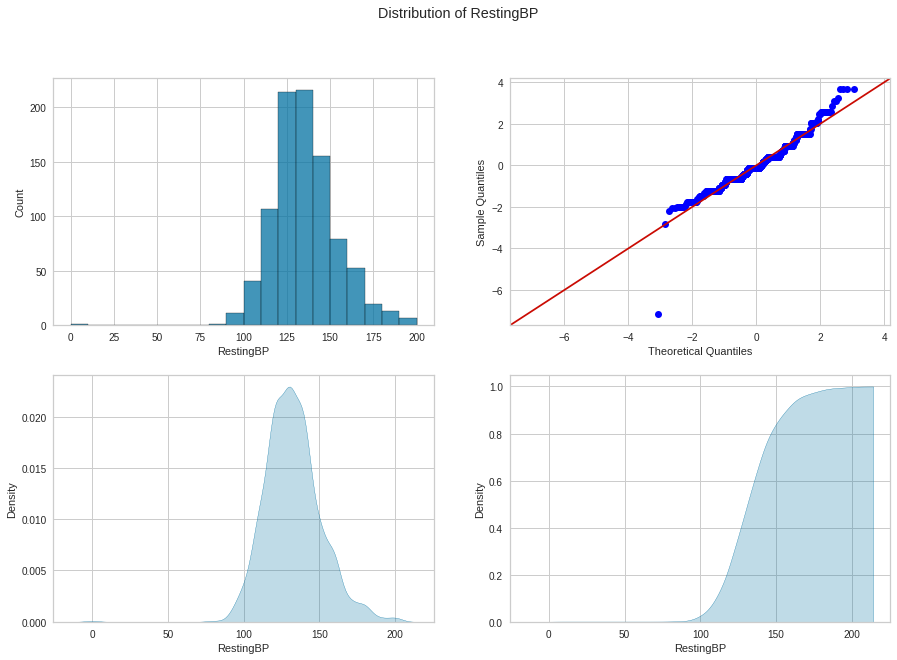

In [241]:
plot_distribution(numerical_col[1])

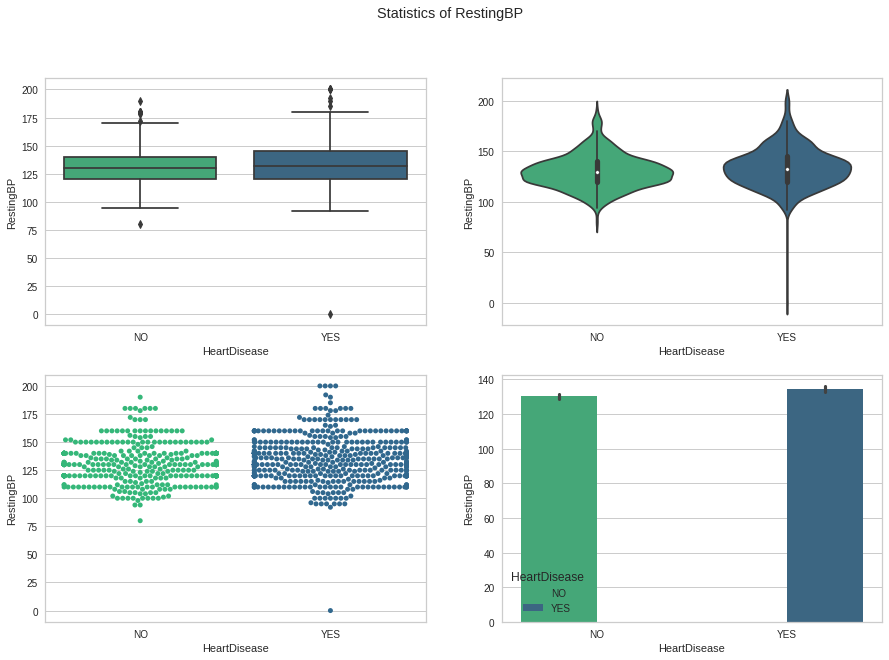

In [242]:
plot_stats(numerical_col[1])

# Cholesterol

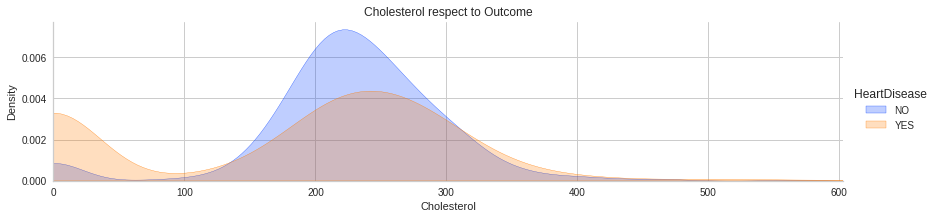

In [243]:
plot_kde(numerical_col[2])

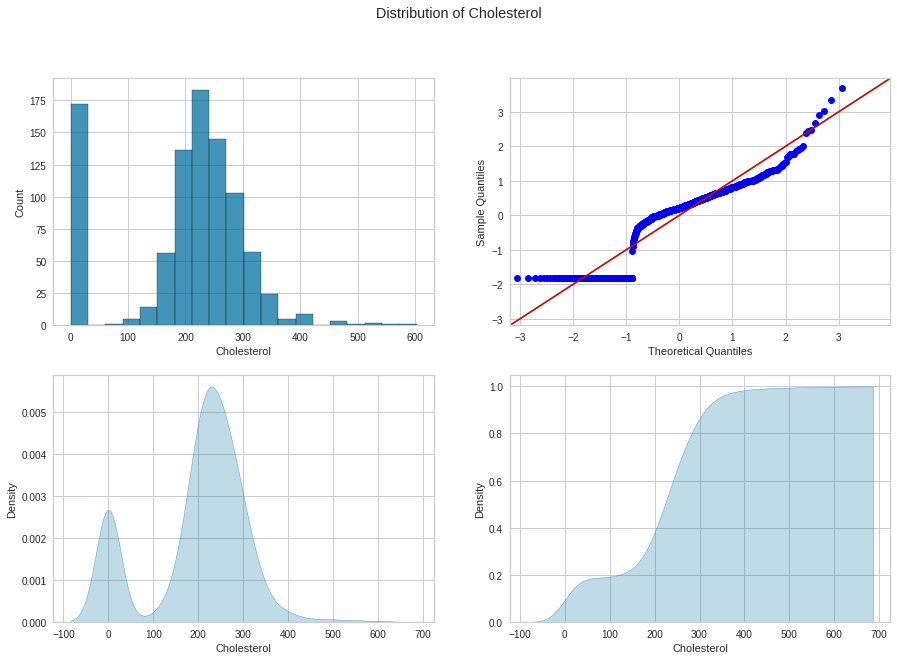

In [244]:
plot_distribution(numerical_col[2])

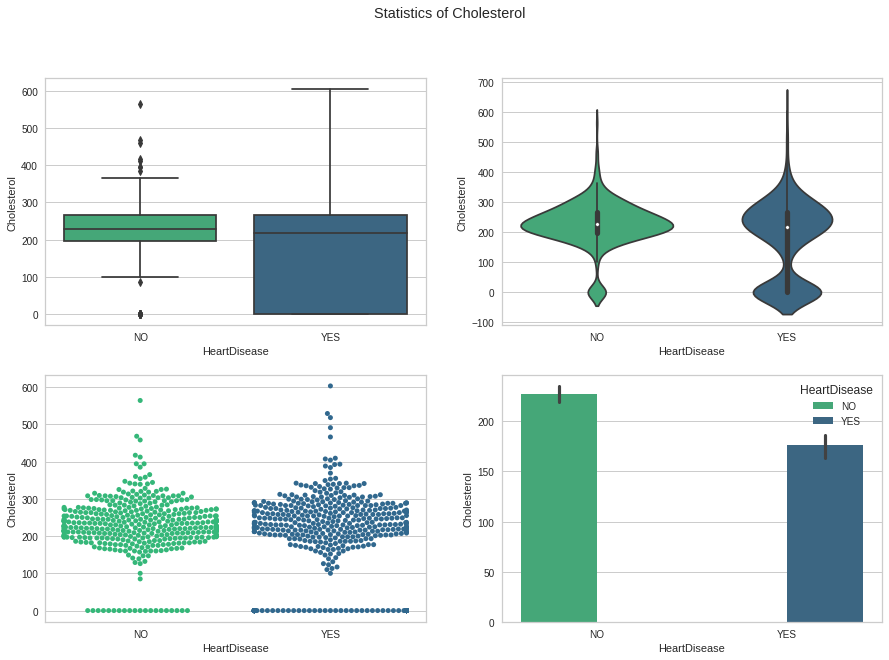

In [245]:
plot_stats(numerical_col[2])

# MaxHR

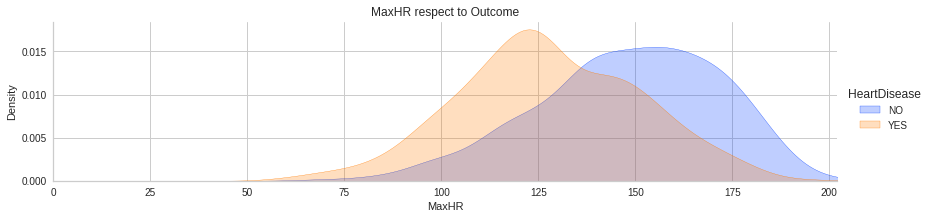

In [246]:
plot_kde(numerical_col[3])

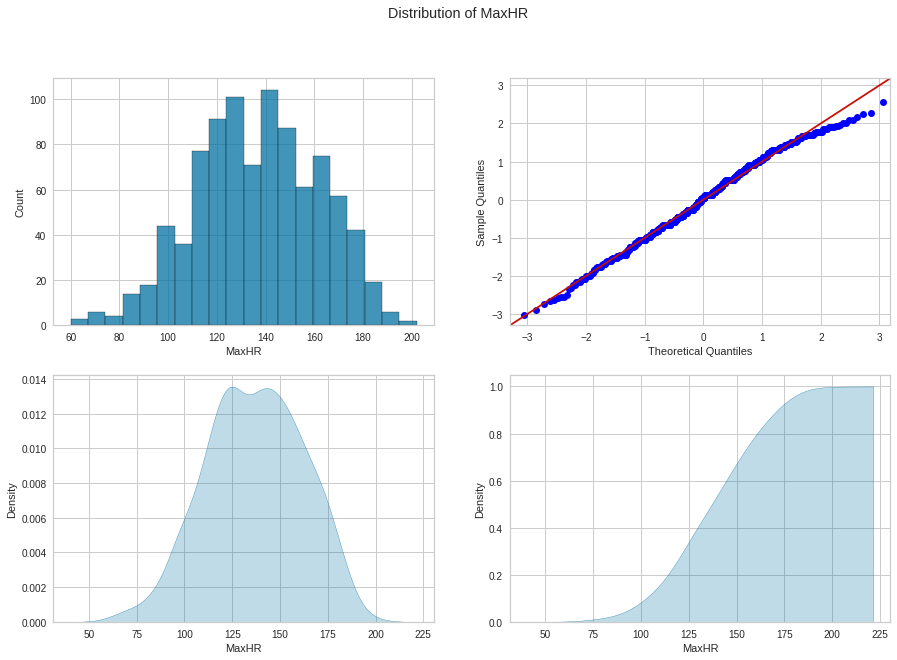

In [247]:
plot_distribution(numerical_col[3])

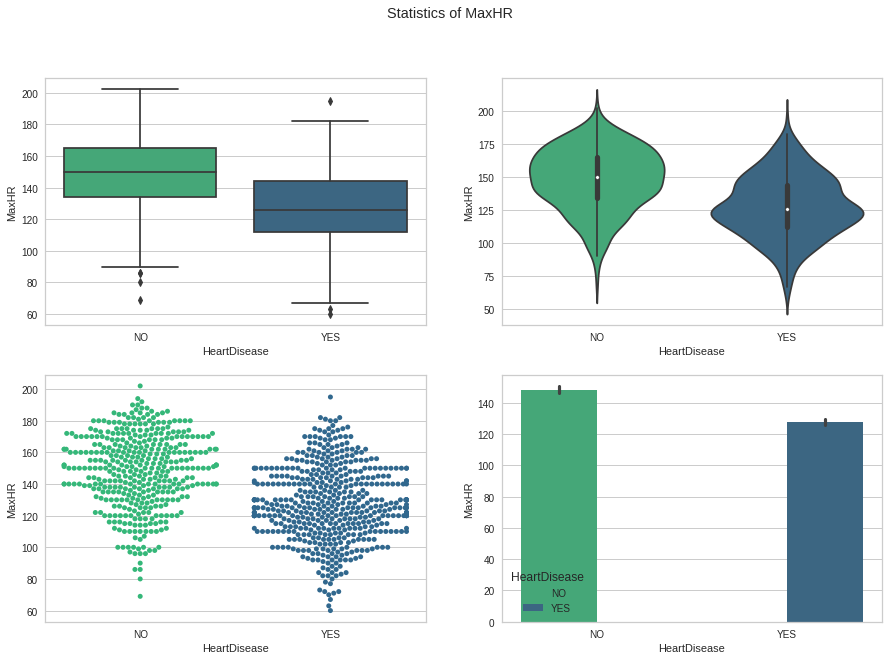

In [248]:
plot_stats(numerical_col[3])

# Oldpeak

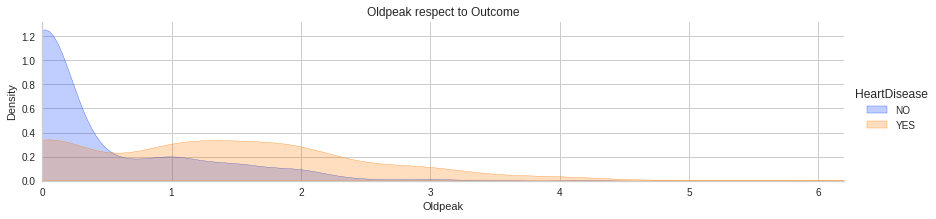

In [249]:
plot_kde(numerical_col[4])

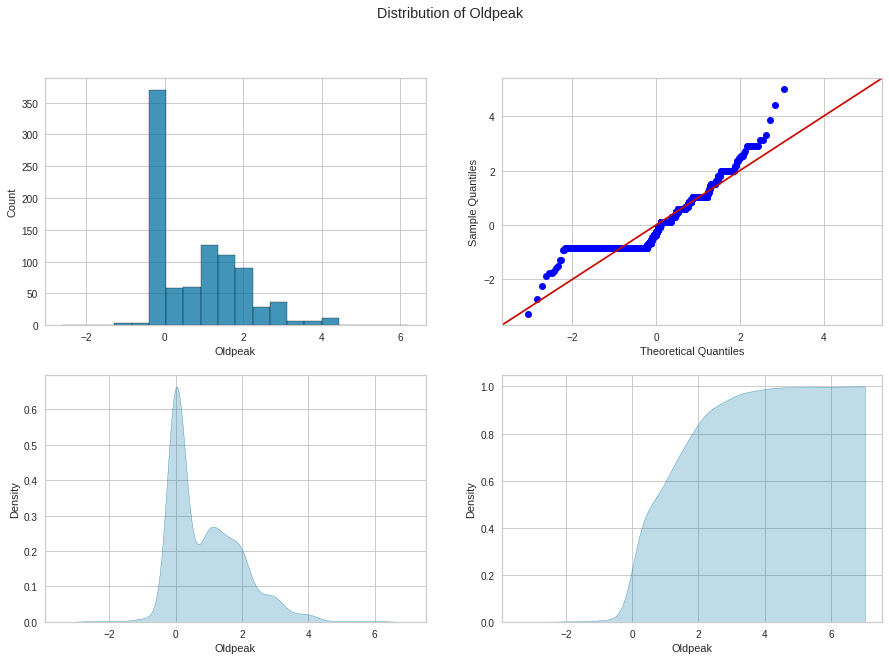

In [250]:
plot_distribution(numerical_col[4])

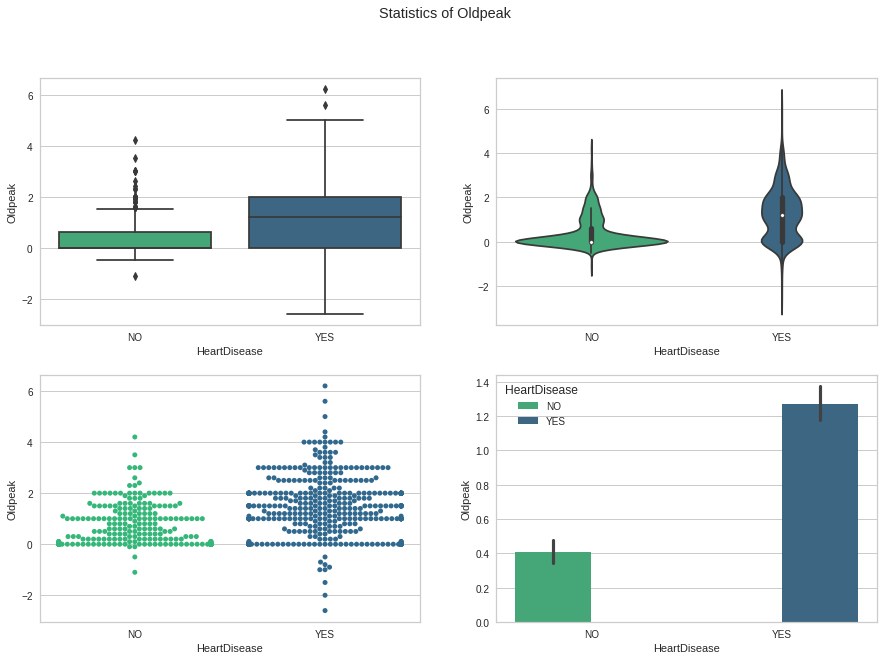

In [251]:
plot_stats(numerical_col[4])

# Pairplot

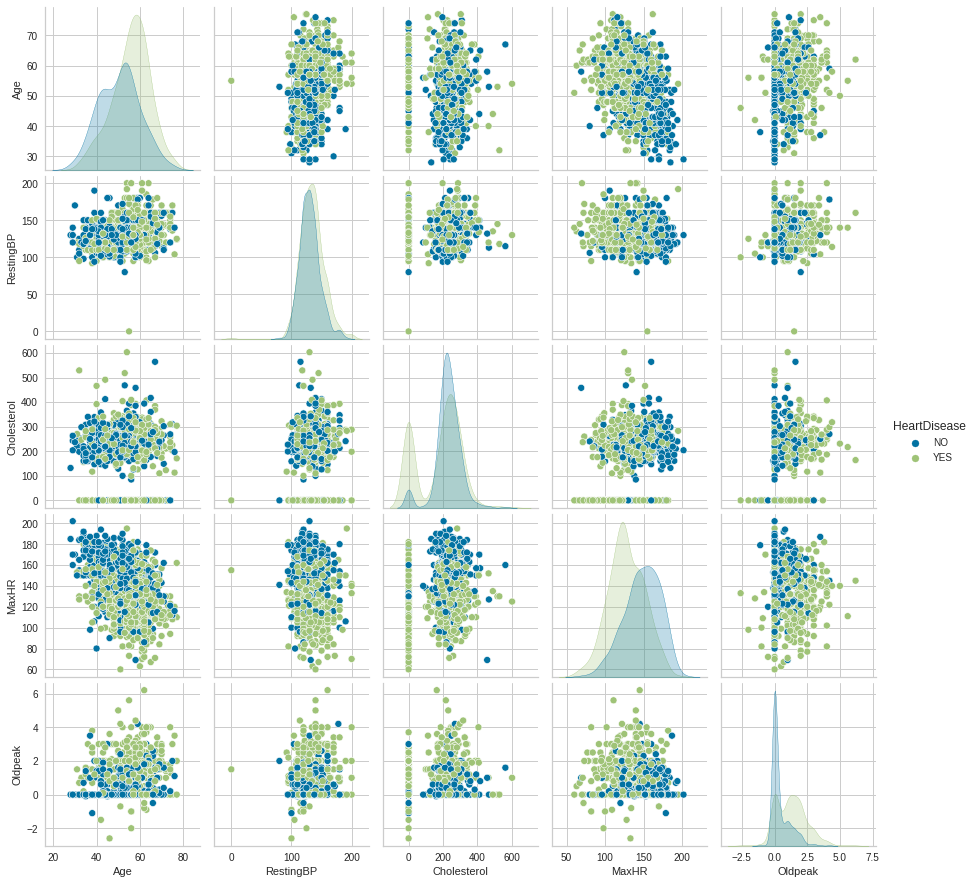

In [252]:
sns.pairplot(
    df,
    hue="HeartDisease",
    x_vars=numerical_col
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

### Observations:
1. Males are consistently more likely to have heart disease.
2. Inidividuals with ASY chest pain are consistently more likely to have heart disease. 
3. Flat ST_Slope have higher HeartDisease rate than other types comparitively
4. People with higher oldpeak tend to have exercise angina. There is no obvious trend with other categorical variables
5. Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference seems small.
6. Most of heart disease Patients have age between 55 and 65
7. Most patients with 0 oldpeak, don't have Heart disease
8. Most tested Patients have RestingBP between 120 and 150

# Feature Encoding

In [253]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)

# Replacing categorical values with its frequency
for col in ['ChestPainType', 'RestingECG', 'ST_Slope']:
    frequency_encoding(df, col)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,173,140,289,No,552,172,N,0.0,395,NO
1,49,F,203,160,180,No,552,156,N,1.0,460,YES
2,37,M,173,130,283,No,178,98,N,0.0,395,NO
3,48,F,496,138,214,No,552,108,Y,1.5,460,YES
4,54,M,203,150,195,No,552,122,N,0.0,395,NO


In [254]:
# replacing 'No' as '0' & 'Yes' as 1
df.Sex.replace(to_replace={"F": 0, "M": 1}, inplace=True)
df.FastingBS.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.ExerciseAngina.replace(to_replace={"N": 0, "Y": 1}, inplace=True)
df.HeartDisease.replace(to_replace={"NO": 0, "YES": 1}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,552,172,0,0.0,395,0
1,49,0,203,160,180,0,552,156,0,1.0,460,1
2,37,1,173,130,283,0,178,98,0,0.0,395,0
3,48,0,496,138,214,0,552,108,1,1.5,460,1
4,54,1,203,150,195,0,552,122,0,0.0,395,0


# Correlation

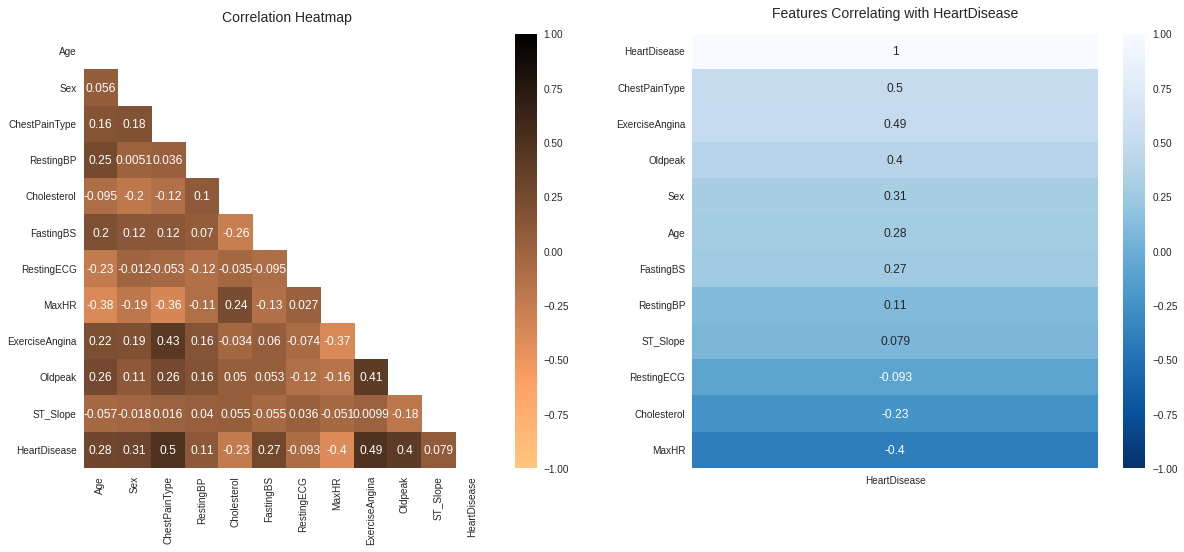

In [255]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df.corr()  # calculate correlation of the dataframe

mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="copper_r"
)  # cornor heatmap of the dataframe correlation

cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="Blues_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'

heatmap.set_title(
    "Features Correlating with HeartDisease",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)

plt.show()  # shows the subplot

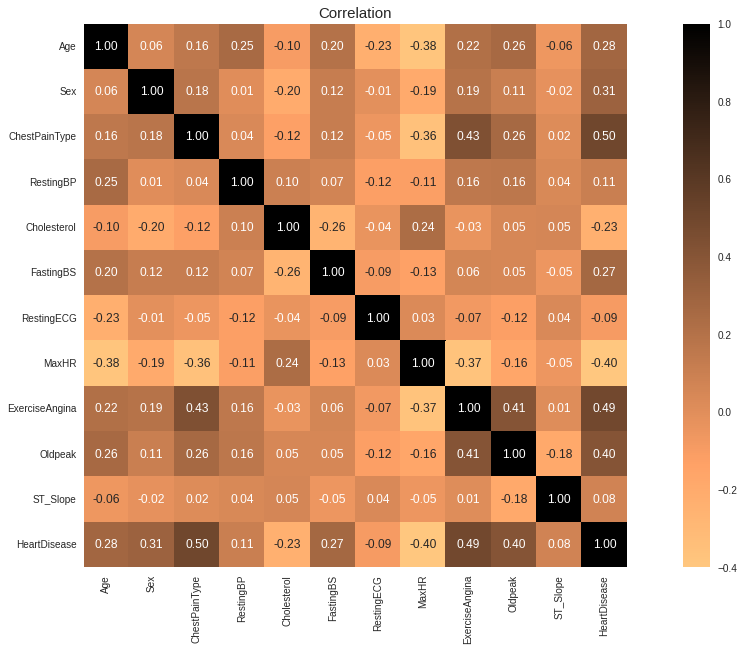

In [256]:
# create a correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))
sns.heatmap(resign_corr, annot=True, fmt=".2f", square=True, cmap="copper_r")
plt.title("Correlation", size=15)
plt.show()

# Data Splitting

In [257]:
X = df.drop(["HeartDisease"],axis = 1)  # X contains all independant variables
y = df["HeartDisease"] # Y contains only the dependant variable

In [258]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,289,0,552,172,0,0.0,395
1,49,0,203,160,180,0,552,156,0,1.0,460
2,37,1,173,130,283,0,178,98,0,0.0,395
3,48,0,496,138,214,0,552,108,1,1.5,460
4,54,1,203,150,195,0,552,122,0,0.0,395


In [259]:
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

## Data Sampling

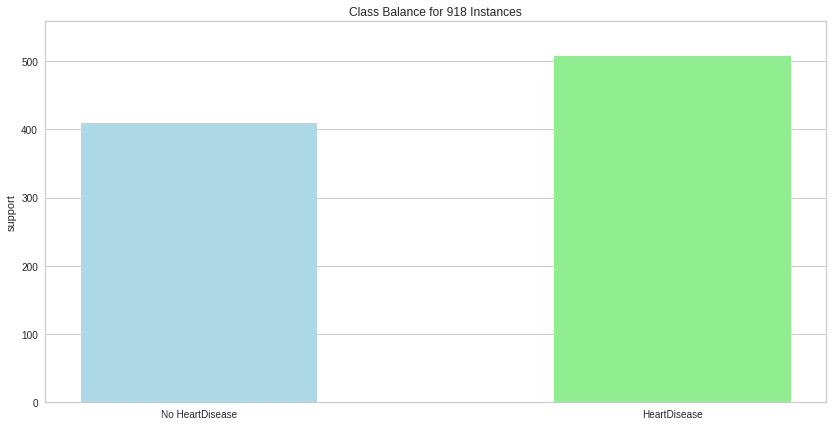

In [260]:
# Class balance between dependant column 'HeartDisease' values
from yellowbrick.target import ClassBalance

classes = ["No HeartDisease", "HeartDisease"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

In [261]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(random_state=14) 
X, y = smt.fit_resample(X, y)

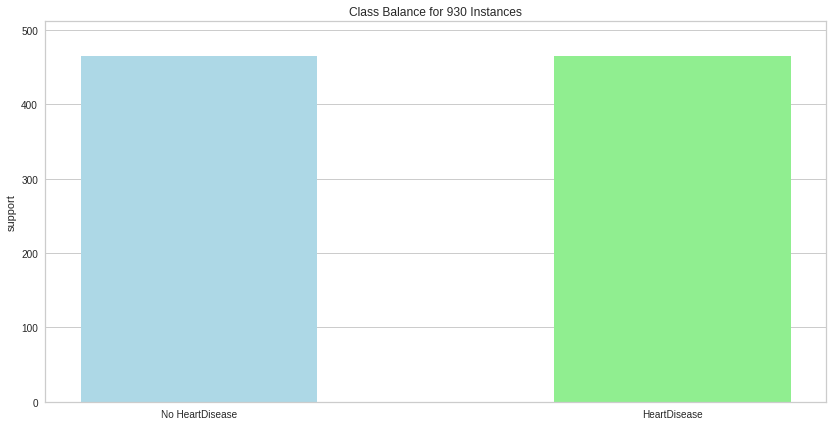

In [262]:
# Rechecking class balance after Combined sampling
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

## Feature Selection

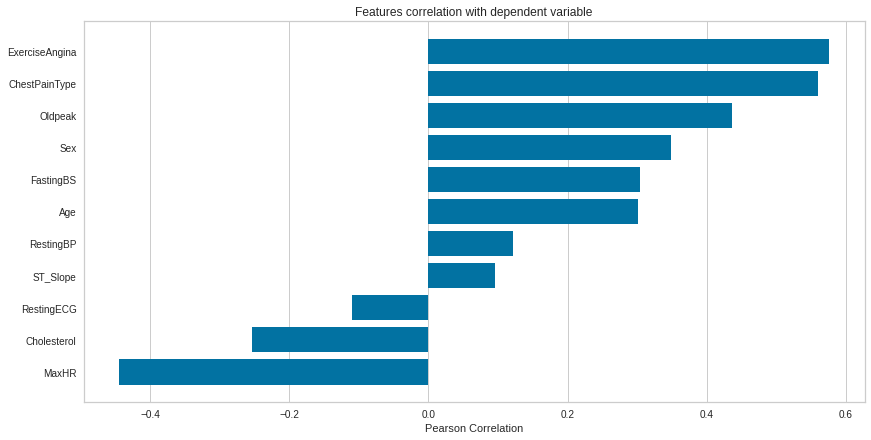

In [263]:
# displays the Features correlation with dependant variable 'HeartDisease' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
vis = FeatureCorrelation(method="pearson", sort=True)
vis.fit(X, y)
vis.show()
plt.show()

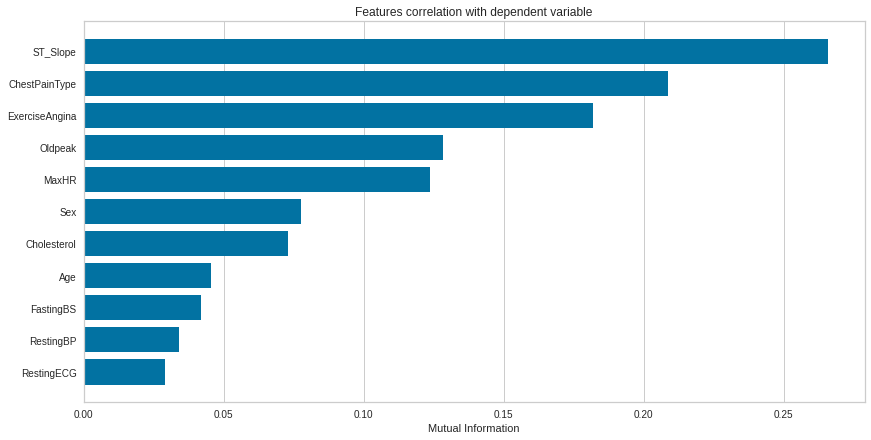

In [264]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [265]:
X.drop(['RestingECG','MaxHR','Cholesterol'],axis = 1,inplace = True)
X.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,0,0,0.0,395
1,49,0,203,160,0,0,1.0,460
2,37,1,173,130,0,0,0.0,395
3,48,0,496,138,0,1,1.5,460
4,54,1,203,150,0,0,0.0,395


In [266]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

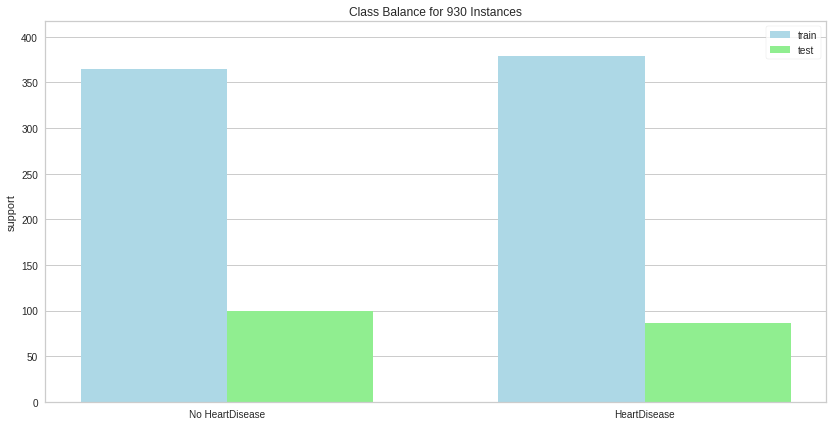

In [267]:
# displays Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

## Training Model

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [269]:
# fitting our data to the random forest classifier
rf_clf = RandomForestClassifier(n_estimators = 20,n_jobs=-1 ,random_state = 43)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=43)

In [270]:
y_pred = rf_clf.predict(X_test)

### Accuracy

In [271]:
print(accuracy_score(y_test,y_pred))

0.9139784946236559


### Error

In [272]:
print(1 - accuracy_score(y_test,y_pred))

0.08602150537634412


### Precision

In [273]:
print(precision_score(y_test,y_pred))

0.8888888888888888


### Recall

In [274]:
print(recall_score(y_test,y_pred))

0.9302325581395349


### F1 score

In [275]:
print(f1_score(y_test,y_pred))

0.9090909090909092


### Class Prediction Error

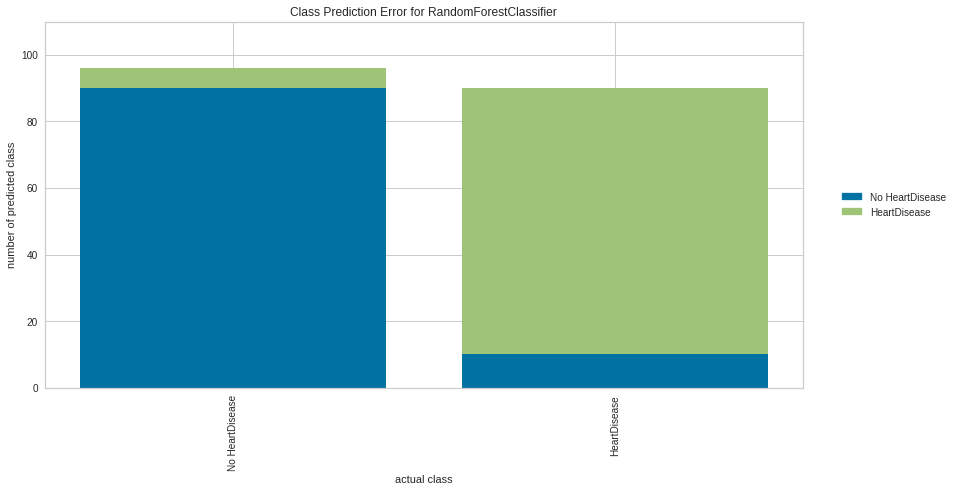

In [276]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (15,7))
viz = class_prediction_error( rf_clf, X_train, y_train, X_test, y_test, classes=classes )
viz.show()
plt.show()

In [277]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ROC curve

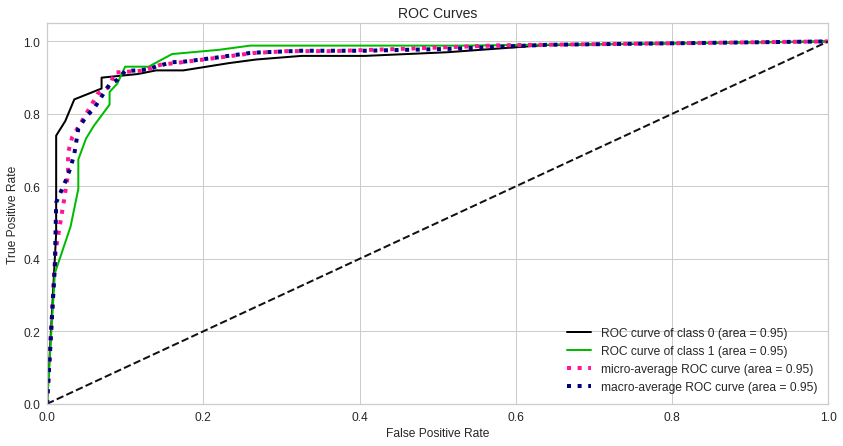

In [278]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve
y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test,y_probas, title_fontsize = 14, figsize= (14,7), text_fontsize= 12)
plt.show()

### Precision Recall curve

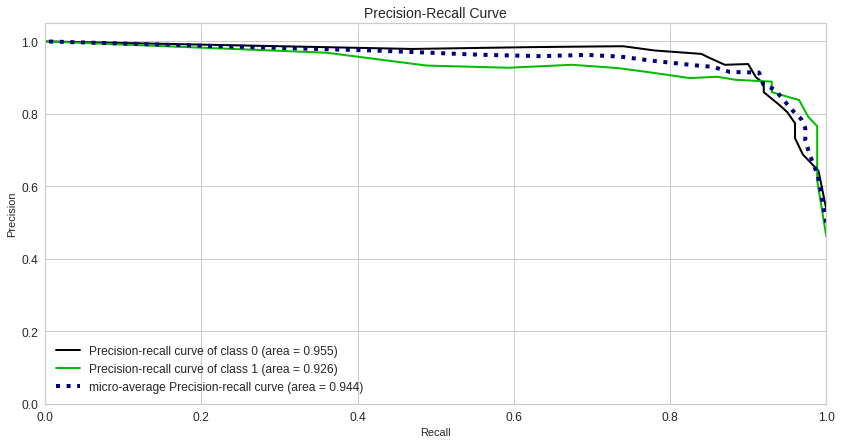

In [279]:
plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

### Learning curve

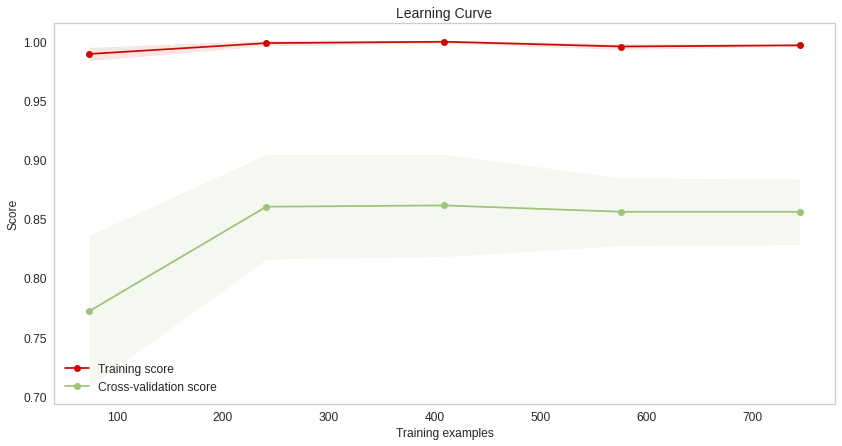

In [280]:
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

### Lift Curve

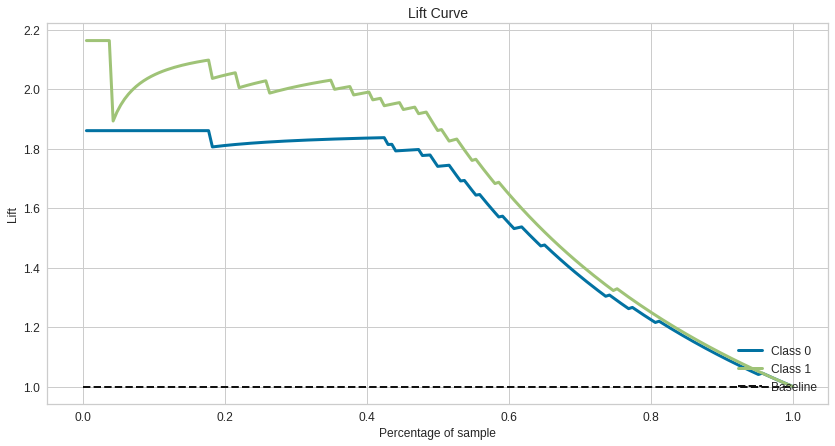

In [281]:
plot_lift_curve(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

### Cumulative gain curve

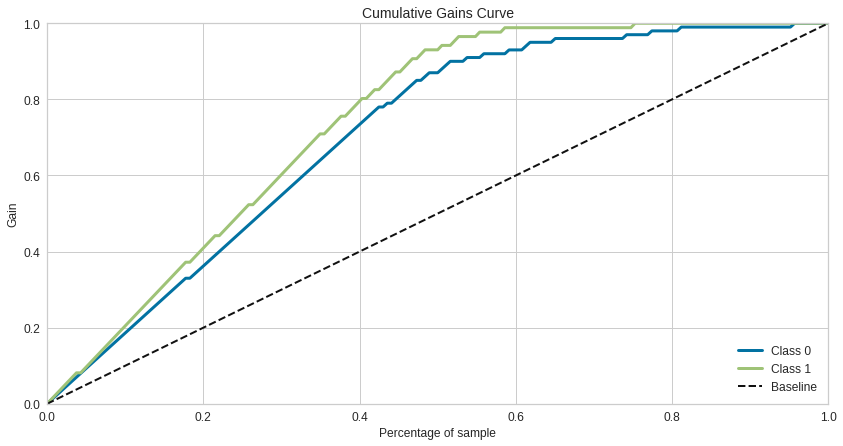

In [282]:
plot_cumulative_gain(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

##Confusion Matrix

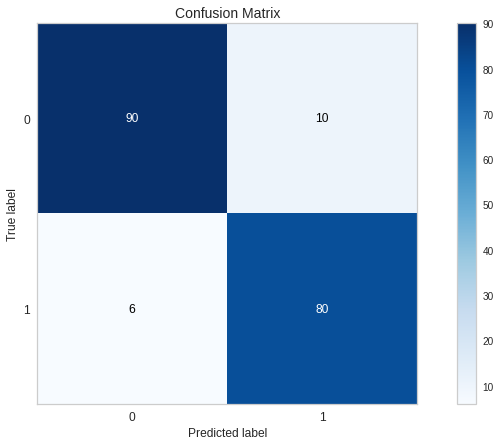

In [283]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

## Classification Report

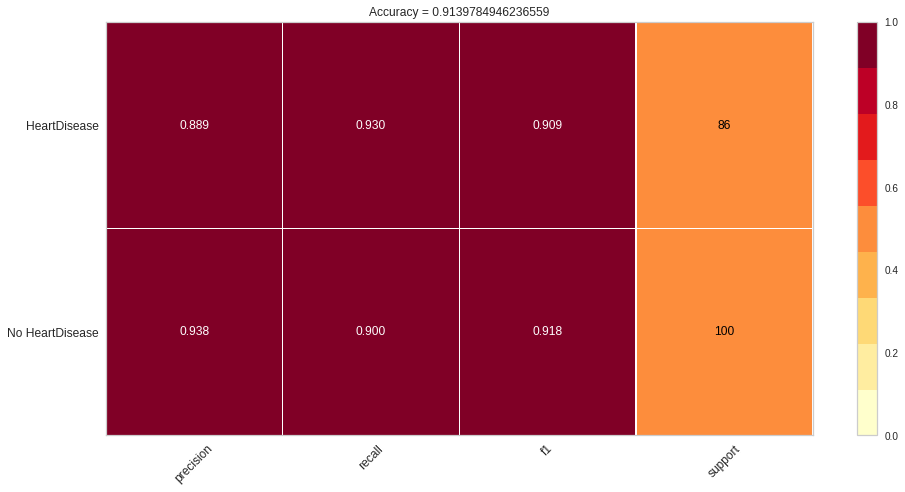

In [284]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}")
plt.show()

#New Predictions

In [285]:
# function to predict using the trained model
def predict_heartdisease(
    Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
):
    Sex = 1 if Sex == "Male" else 0
    FastingBS = 1 if FastingBS == "Yes" else 0
    ExerciseAngina = 1 if ExerciseAngina == "Yes" else 0
    if ChestPainType == "ASY":
        ChestPainType = 496
    elif ChestPainType == "NAP":
        ChestPainType = 203
    elif ChestPainType == "ATA":
        ChestPainType = 173
    else:
        ChestPainType = 46
    if ST_Slope == "Flat":
        ST_Slope = 460
    elif ST_Slope == "Up":
        ST_Slope = 395
    else:
        ST_Slope = 63
    x = [[Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope]]
    return rf_clf.predict(x)

In [286]:
# Prediction 1
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Male", "ASY", 130, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Oops! You have Heart Disease.


In [287]:
# Prediction 2
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Feale", "NAP", 110, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Great! You don't have Heart Disease.


# Saving the Model

In [288]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
